In [55]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Step 2: Loading Data
data = pd.read_csv('telecom_churn_data.csv')
data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx', sheet_name=None)

# Display initial rows and data information
print("Customer Data Sample:")
display(data.head())
print("\nData Information:")
display(data.info())

Customer Data Sample:


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


None

In [ ]:
Step 3: Filter High-Value Customers

In [63]:
# Step 3: Filtering High-Value Customers
# Calculate average recharge amount for June and July
data['avg_recharge_6_7'] = data[['arpu_6', 'arpu_7']].mean(axis=1)
threshold = data['avg_recharge_6_7'].quantile(0.7)
high_value_customers = data[data['avg_recharge_6_7'] >= threshold]
print(f"\nHigh-Value Customer Count: {high_value_customers.shape[0]}")


High-Value Customer Count: 30000


In [ ]:
Step 4: Tag Churners and Remove Churn Phase Attributes

In [65]:
# Tag churners based on criteria for September (no calls or data usage)
high_value_customers['churn'] = (
    (high_value_customers['total_ic_mou_9'] == 0) & 
    (high_value_customers['total_og_mou_9'] == 0) & 
    (high_value_customers['vol_2g_mb_9'] == 0) & 
    (high_value_customers['vol_3g_mb_9'] == 0)
).astype(int)

# Remove churn phase attributes (columns ending with '_9')
churn_phase_columns = [col for col in high_value_customers.columns if '_9' in col]
high_value_customers = high_value_customers.drop(columns=churn_phase_columns)

print("\nData after removing churn phase columns:")
display(high_value_customers.head())


Data after removing churn phase columns:


/var/folders/g8/sqg77xps2x33nn25_xtnl61c0000gn/T/ipykernel_41416/1868687871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_customers['churn'] = (


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_6_7,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1209.5150,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,435.4720,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,349.2585,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,365.4220,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,354.4940,0


In [ ]:
Step 5: Prepare Data for Modeling

In [71]:
# Removing non-numeric columns to avoid SMOTE errors
features = [col for col in high_value_customers.columns if col not in ['mobile_number', 'churn', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'] and high_value_customers[col].dtype in [np.float64, np.int64]]
X = high_value_customers[features].fillna(0)
y = high_value_customers['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
Step 6: Handle Class Imbalance with SMOTE

In [73]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass Distribution after SMOTE:")
print(y_train_smote.value_counts())


Class Distribution after SMOTE:
churn
0    21878
1    21878
Name: count, dtype: int64


In [ ]:
Step 7: Logistic Regression with Standardization and Increased Iterations

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creating a pipeline to standardize data and apply logistic regression
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('log_reg', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42))
])

log_reg_pipeline.fit(X_train_smote, y_train_smote)
y_pred_log = log_reg_pipeline.predict(X_test)

# Logistic Regression Evaluation
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      5470
           1       0.42      0.74      0.54       530

    accuracy                           0.89      6000
   macro avg       0.70      0.82      0.74      6000
weighted avg       0.92      0.89      0.90      6000

Confusion Matrix:
[[4936  534]
 [ 136  394]]


In [ ]:
Step 8: Train and Evaluate Random Forest Model

In [79]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5470
           1       0.63      0.72      0.67       530

    accuracy                           0.94      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.94      0.94      0.94      6000

Confusion Matrix:
[[5250  220]
 [ 150  380]]


In [ ]:
Step 9: Feature Importance Analysis with Random Forest


Top 10 Important Features:


,Feature,Importance
15,roam_ic_mou_8,0.053887
105,total_rech_amt_8,0.050169
18,roam_og_mou_8,0.050046
6,arpu_8,0.048434
90,total_ic_mou_8,0.044252
72,loc_ic_mou_8,0.042129
60,total_og_mou_8,0.037576
66,loc_ic_t2m_mou_8,0.036797
111,last_day_rch_amt_8,0.033960
108,max_rech_amt_8,0.030098


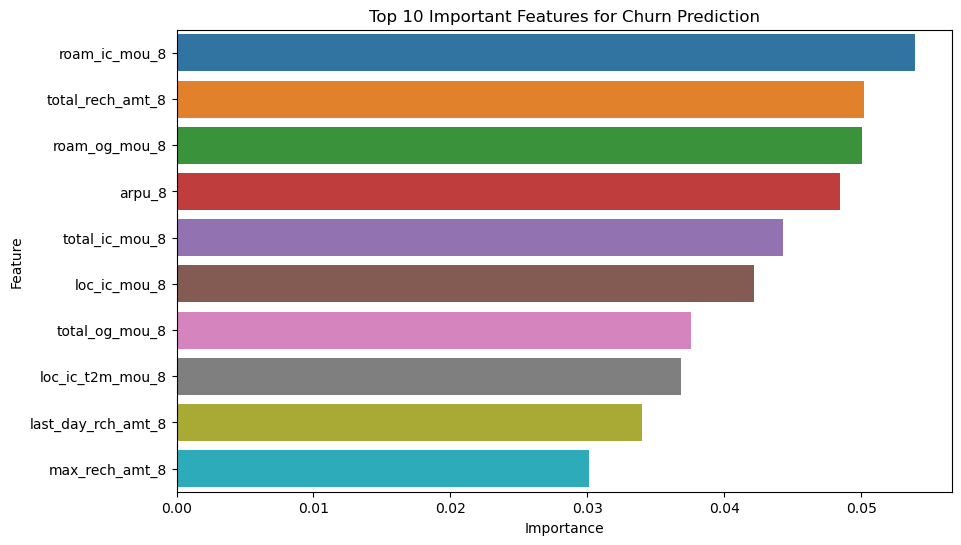

In [81]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

print("\nTop 10 Important Features:")
display(feature_importances)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()